In [1]:
import pyaerocom as pya
pya.__version__

'0.8.1.dev3'

**NOTE**: needs version 0.8.1.dev3 or later!

In [2]:
pya.const.BASEDIR = '/home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/'

Initiating directories for pyaerocom test dataset


In [3]:
pya.const.OBS_IDS

['AeronetSunV2Lev1.5.daily',
 'AeronetSun_2.0_NRT',
 'AeronetSunV2Lev2.daily',
 'AeronetSunV2Lev2.AP',
 'AeronetSDAV2Lev2.daily',
 'AeronetSDAV2Lev2.AP',
 'AeronetInvV2Lev1.5.daily',
 'AeronetInvV2Lev1.5.AP',
 'AeronetInvV2Lev2.daily',
 'AeronetInvV2Lev2.AP',
 'AeronetSunV3Lev1.5.daily',
 'AeronetSunV3Lev1.5.AP',
 'AeronetSunV3Lev2.daily',
 'AeronetSunV3Lev2.AP',
 'AeronetSDAV3Lev1.5.daily',
 'AeronetSDAV3Lev1.5.AP',
 'AeronetSDAV3Lev2.daily',
 'AeronetSDAV3Lev2.AP',
 'AeronetInvV3Lev1.5.daily',
 'AeronetInvV3Lev2.daily',
 'EBASMC',
 'EEAAQeRep',
 'EARLINET',
 'GAWTADsubsetAasEtAl',
 'DMS_AMS_CVO']

**NOTE**: these are all observation data IDs that are theoretically available, but some of them are not provided in the pyaerocom-testdata database. You can check using `pya.browse_database`

In [4]:
read_factory = pya.io.ReadUngridded('GAWTADsubsetAasEtAl')
read_factory.get_reader().PROVIDES_VARIABLES

['concso2', 'concso4', 'pr', 'wetso4', 'concso4pr']

In [5]:
obsdata = read_factory.read('GAWTADsubsetAasEtAl', 'concso4')
obsdata

UngriddedData <networks: ['GAWTADsubsetAasEtAl']; vars: ['concso4']; instruments: ['3_stage_filterpack', 'IMPROVE_PM2.5', 'filter-1pack', 'filter_1pack', 'filter_3pack', 'filter_2pack', 'pm10_sampler', 'filter_denuder_sampler', 'filter-3pack'];No. of stations: 346

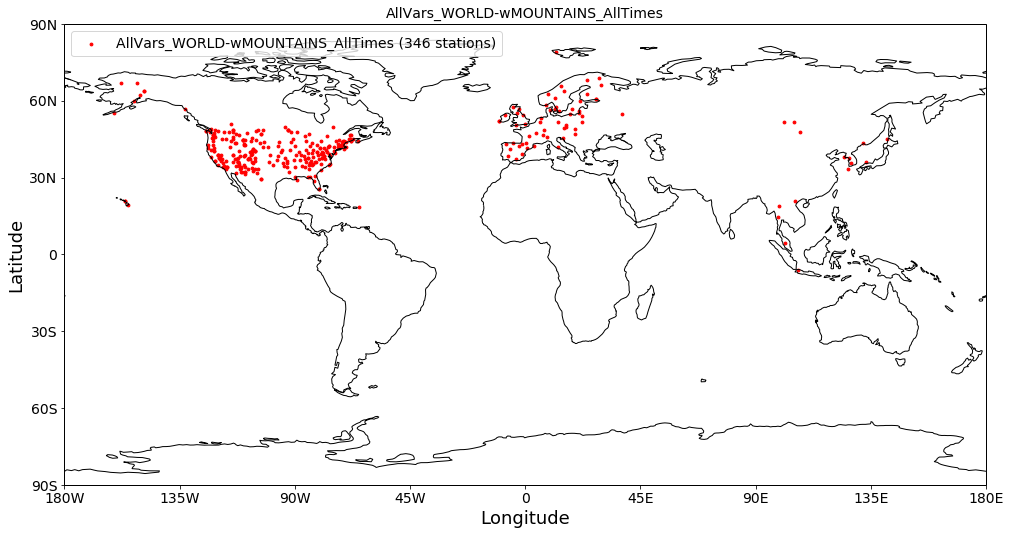

In [6]:
obsdata.plot_station_coordinates();

In [7]:
len(obsdata.metadata)

346

In [8]:
print(obsdata.unique_station_names)

['Abington', 'Acadia NP', 'Acadia_NP', 'Addison_Pinnacle', 'Agua_Tibia', 'Algoma', 'Alhambra', 'Ambler', 'Anholt', 'Ann Arbor', 'Arches_NP', 'Arendtsville', 'Ashland', 'Badlands_NP', 'Baengnyeong_Island', 'Bandelier_NM', 'Barcarrota', 'Barcombe Mills', 'Barrier_Lake', 'Beaufort', 'Beltsville', 'Big Bend NP', 'Big_Bend_NP', 'Birkenes I and II', 'Blackwater NWR', 'Bliss_SP_(TRPA)', 'Blue_Mounds', 'Bondville', 'Bosque_del_Apache', 'Boulder_Lake', 'Boundary_Waters_Canoe_Area', 'Bredkälen', 'Breton', 'Breton_Island', 'Bridger_Wilderness', 'Bridgton', 'Brigantine_NWR', 'Brooklyn_Lake', 'Bryce_Canyon_NP', 'Cabinet_Mountains', 'Cabo de Creus', 'Caddo Valley', 'Cadiz', 'Candor', 'Caney_Creek', 'Canyonlands NP', 'Canyonlands_NP', 'Cape_Cod', 'Cape_Romain_NWR', 'Capitol_Reef_NP', 'Casco_Bay', 'Cedar Creek', 'Cedar_Bluff', 'Centennial', 'Chalk River', 'Chapais', 'Chassahowitzka_NWR', 'Cheju', 'Cherokee_Nation', 'Chiang Mai (Mae Hia)', 'Chiricahua NM', 'Chiricahua_NM', 'Chopok', 'Claryville', 'Clou

In [9]:
station = obsdata.to_station_data('Tana*')
print(station)


Pyaerocom StationData
---------------------
var_info (BrowseDict):
  concso4 (OrderedDict):
    units: ug m-3
    overlap: False
station_coords (dict):
  latitude: 4.466667
  longitude: 101.383333
  altitude: nan
data_err (BrowseDict): <empty_dict>
overlap (BrowseDict): <empty_dict>
data_flagged (BrowseDict): <empty_dict>
filename: /home/notebook/shared-ns1000k/inputs/pyaerocom-testdata//obsdata/GAWTADSulphurSubset/data/monthly_so4_aero.csv
station_id: None
station_name: Tanah Rata
instrument_name: 3_stage_filterpack
PI: None
country: None
ts_type: monthly
latitude: 4.466667
longitude: 101.383333
altitude: nan
data_id: GAWTADsubsetAasEtAl
dataset_name: None
data_product: None
data_version: None
data_level: None
revision_date: None
website: None
ts_type_src: monthly
stat_merge_pref_attr: None
data_revision: 20190522

Data arrays
.................
dtime (ndarray, 188 items): [2000-01-01T00:00:00.000000000, 2000-02-01T00:00:00.000000000, ..., 2015-11-01T00:00:00.000000000, 2015-12-01T00:

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


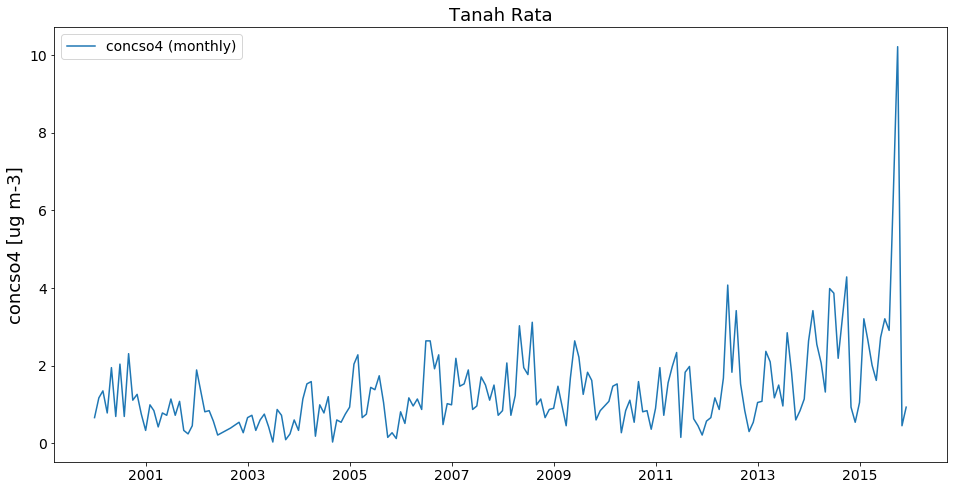

In [10]:
station.plot_timeseries('concso4');

In [11]:
help(station.compute_trend)

Help on method compute_trend in module pyaerocom.stationdata:

compute_trend(var_name, start_year=None, stop_year=None, season=None, slope_confidence=None, **alt_range) method of pyaerocom.stationdata.StationData instance



In [12]:
trend_info = station.compute_trend('concso4', start_year=2001, stop_year=2009)
trend_info

{'pval': 0.002365577053397881,
 'm': 0.13073429925325294,
 'm_err': 0.028531628463017787,
 'n': 9,
 'y_mean': 1.0410477935443632,
 'y_min': 0.5018000155933261,
 'y_max': 1.5303652216851187,
 'coverage': None,
 'slp': 24.072939013178072,
 'slp_err': 7.460016102620728,
 'reg0': 0.5430757714364916,
 't0': None,
 'slp_2001': 24.072939013178072,
 'slp_2001_err': 7.460016102620728,
 'reg0_2001': 0.5430757714364916,
 'yoffs': -3.50968750541435,
 'period': '2001-2009'}

In [16]:
trend_info = station.compute_trend('concso4', start_year=2011, stop_year=2016)
trend_info

{'pval': 0.022977401503206086,
 'm': 0.5454890716773222,
 'm_err': 0.2533965252871774,
 'n': 5,
 'y_mean': 2.009197276365716,
 'y_min': 1.2232935703518897,
 'y_max': 3.325361297364729,
 'coverage': None,
 'slp': 149.65753424657507,
 'slp_err': 237.74789181341114,
 'reg0': 0.3644915536150535,
 't0': None,
 'slp_2011': 149.65753424657507,
 'slp_2011_err': 237.74789181341114,
 'reg0_2011': 0.3644915536150535,
 'yoffs': -22.000560385155158,
 'period': '2011-2016'}

In [18]:
help(station.trends['concso4'].plot)

Help on method plot in module pyaerocom.trends_helpers:

plot(season='all', period=None, ax=None) method of pyaerocom.trends_helpers.TrendsEngine instance



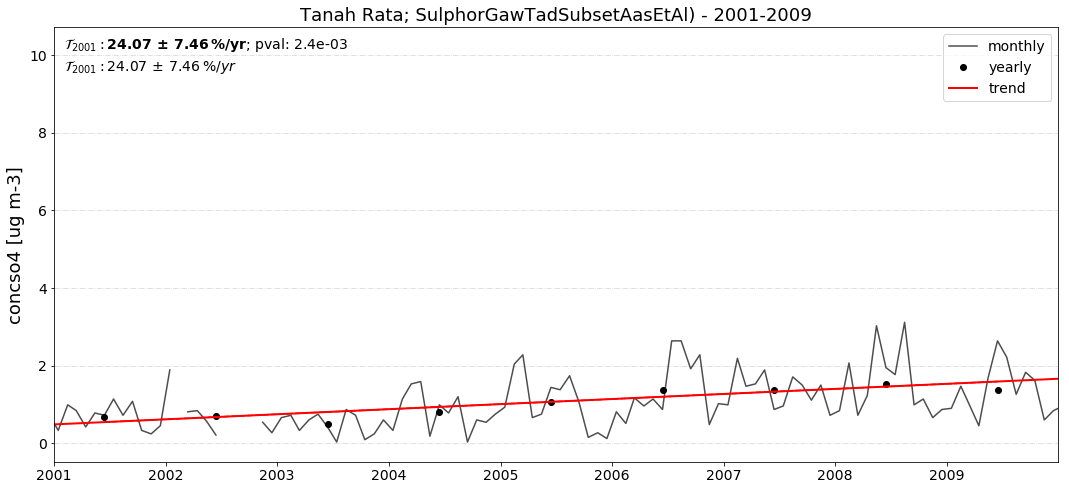

In [19]:
station.trends['concso4'].plot(period='2001-2009');

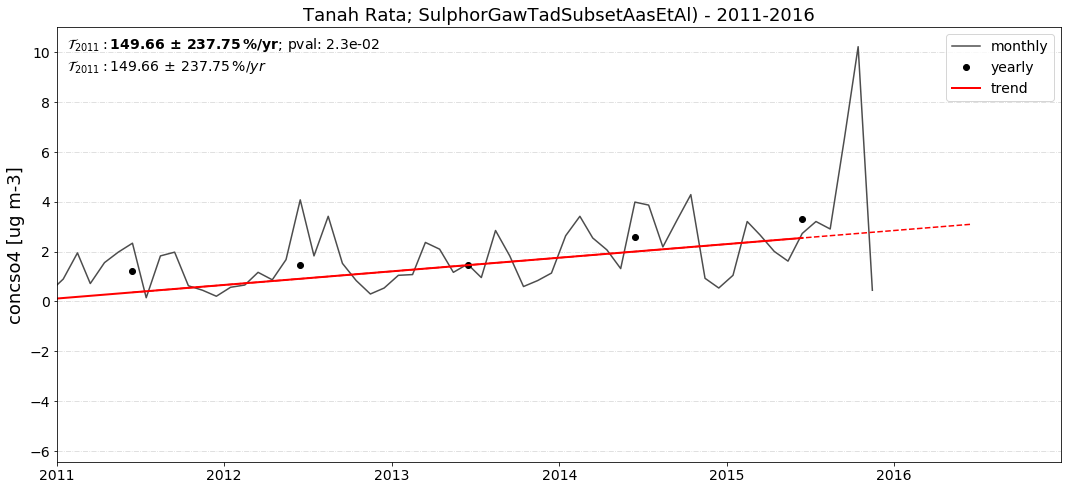

In [20]:
station.trends['concso4'].plot(period='2011-2016');

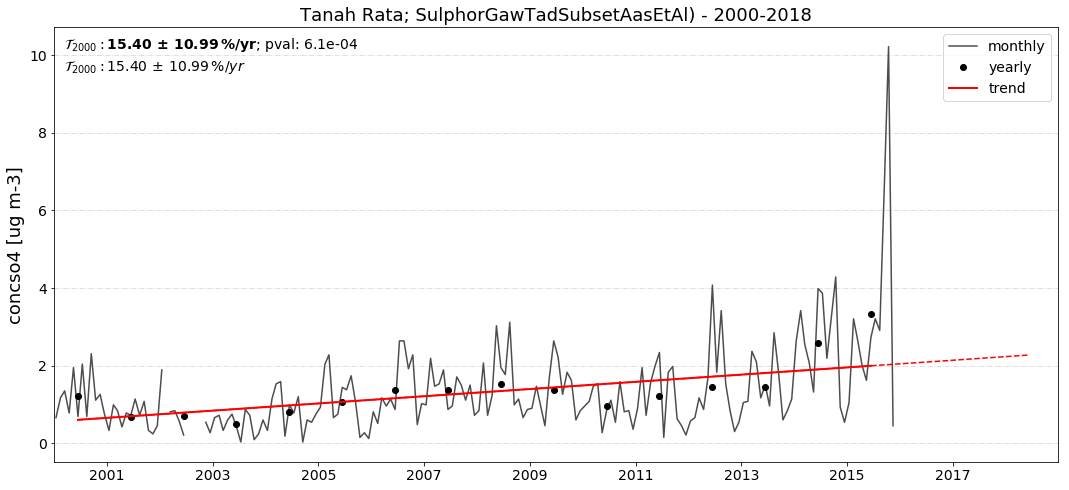

In [23]:
station.compute_trend('concso4', 2000, 2018)
station.trends['concso4'].plot(period='2000-2018');